Instructions for updating:
non-resource variables are not supported in the long term
Epoch:  0 ; Error: 233.57105520361338
Test error = 373.74450353251615
8 / 46  right
tp =  8 fp =  38 fn =  0 tn =  0
P =  0.17391304347826086 R =  1.0 F1 =  0.2962962962962963
Epoch:  100 ; Error: 132.768713431024
Test error = 191.29377858098545
8 / 46  right
tp =  8 fp =  38 fn =  0 tn =  0
P =  0.17391304347826086 R =  1.0 F1 =  0.2962962962962963
Epoch:  200 ; Error: 50.9048621510905
Test error = 34.28971733331259
17 / 46  right
tp =  8 fp =  29 fn =  0 tn =  9
P =  0.21621621621621623 R =  1.0 F1 =  0.35555555555555557
Epoch:  300 ; Error: 20.18885991287803
Test error = 20.56234961177412
30 / 46  right
tp =  1 fp =  9 fn =  7 tn =  29
P =  0.1 R =  0.125 F1 =  0.1111111111111111
Epoch:  400 ; Error: 14.697113535597762
Test error = 22.625153032229203
35 / 46  right
tp =  1 fp =  4 fn =  7 tn =  34
P =  0.2 R =  0.125 F1 =  0.15384615384615385
Epoch:  500 ; Error: 14.115138452087129
Test error = 22.7

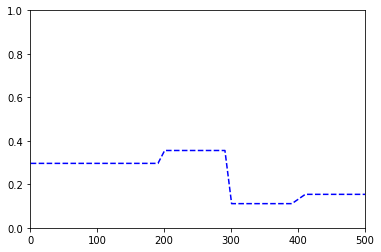

Test error = 6.449645677024548
35 / 46  right
tp =  1 fp =  4.0 fn =  7.0 tn =  34
P =  0.2 R =  0.125 F1 =  0.15384615384615385


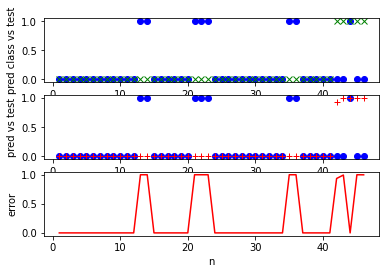

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
total_features, total_prices = load_boston(True)


ideal_prise = sum(total_prices)/len(total_prices)
train_features = total_features[:460, [0,1,2,3,4,5,6,7,8,9,10,11,12]]
train_class = np.array([[1.0 if i >= ideal_prise else 0.0] for i in total_prices[:460]])

test_features = total_features[460:, [0,1,2,3,4,5,6,7,8,9,10,11,12]]
test_class = np.array([[1.0 if i >= ideal_prise else 0.0] for i in total_prices[460:]])

num_features = 13

w = tf.Variable(np.random.rand(num_features,1), dtype=tf.float64)
b = tf.Variable(tf.zeros(1, dtype=tf.float64))
learning_rate = 0.00001
epochs = 5000

def calc_logits(x):
    return tf.add(b, tf.matmul(x, w))

#calculate predictions
def calc_predictions(x):
    predictions = tf.nn.sigmoid(calc_logits(x))
    return predictions

#calculate error
def calc_error(x,targets):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=calc_logits(x),
                                                                  labels=targets))

error = calc_error(train_features, train_class)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

points = [[],[],[]]
points_test = [[],[],[],[]]
points_test_err =[[],[]]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    test_error1 = sess.run(calc_error(test_features, test_class))
    i = 0
    for i in list(range(epochs)):
        _error, _train_step = sess.run([error, optimizer])
        if i % 100 == 0:
            print('Epoch: ', i, '; Error:', _error)
            predictions, test_error = sess.run([calc_predictions(test_features), calc_error(test_features, test_class)])

            if test_error > test_error1:
                epochs = i
                i = -2
            test_error1 = test_error
            predictions_classes = []
            right = 0
            tp = 0
            tn = 0
            for j in range(len(predictions)):
                predictions_classes.append(1 if predictions[j] > 0.5 else 0)
                if np.allclose(predictions_classes[j], test_class[j]):
                    right += 1
                    if np.allclose(predictions_classes[j], [1.0, ]):
                        tp += 1
            fp = sum(predictions_classes) - tp
            tn = right - tp
            fn = len(predictions_classes) - sum(predictions_classes) - tn
            print('Test error =', test_error)
            print(right, '/', len(predictions), ' right')
            print('tp = ', tp, 'fp = ', fp, 'fn = ', fn, 'tn = ', tn)
            P = tp / (tp + fp)
            R = tp / (tp + fn)
            F1 = 2 * tp / (2 * tp + fn + fp)
            print('P = ', P, 'R = ', R, 'F1 = ', F1)

        if i % 10 == 0.:
            points[0].append(i + 1)
            points[1].append(_error)
            points[2].append(F1)
        i += 1
    plt.plot(points[0], points[1], 'r--')
    plt.plot(points[0], points[2], 'b--')
    plt.axis([0, epochs, 0, 1])
    plt.show()
    
    predictions, test_error = sess.run([calc_predictions(test_features), calc_error(test_features, test_class)])
    predictions_classes = []
    right = 0
    tp = 0
    tn = 0
    for j in range(len(predictions)):
        predictions_classes.append(1.0 if predictions[j] > 0.5 else 0.0)
        if np.allclose(predictions_classes[j], test_class[j]):
            right += 1
            if np.allclose(predictions_classes[j], [1.0, ]):
                tp += 1
    fp = sum(predictions_classes) - tp
    tn = right - tp
    fn = len(predictions_classes) - sum(predictions_classes) - tn

    print('Test error =', test_error)
    print(right, '/', len(predictions), ' right')

    print('tp = ', tp, 'fp = ', fp, 'fn = ', fn, 'tn = ', tn)
    P = tp / (tp + fp)
    R = tp / (tp + fn)
    F1 = 2 * tp / (2 * tp + fn + fp)
    print('P = ', P, 'R = ', R, 'F1 = ', F1)
    for i in range(len(test_class)):
        err = abs(test_class[i] - predictions[i])
        points_test_err[0].append(i + 1)
        points_test_err[1].append(err)
        points_test[0].append(i + 1)
        points_test[1].append(test_class[i])
        points_test[2].append(predictions[i])
        points_test[3].append(predictions_classes[i])

    plt.subplot(3, 1, 1)
    plt.plot(points_test[0], points_test[1], 'bo') #test_class
    plt.plot(points_test[0], points_test[3], 'gx') #predictions_classes
    plt.ylabel('pred class vs test')

    plt.xlabel('n')

    plt.subplot(3, 1, 2)
    plt.plot(points_test[0], points_test[1], 'bo') #test_class
    plt.plot(points_test[0], points_test[2], 'r+') #predictions
    plt.ylabel('pred vs test')
    plt.xlabel('n')

    plt.subplot(3, 1, 3)
    plt.plot(points_test_err[0], points_test_err[1], 'r-')
    plt.xlabel('n')
    plt.ylabel('error')
    plt.show()
